In [ ]:
#1

In [26]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#--Leer la iamgen
img = cv.imread('images/cambiar-rueda.png', cv.COLOR_BGR2GRAY)
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#--Convertir a escala de grises
grayImage = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#Detectar bordes
#--Operador Laplaciano

dst = cv.Laplacian(grayImage, cv.CV_16S, ksize = 3)
Laplacian = cv.convertScaleAbs(dst)

#detectar lineas
dst = np.copy(img)
edges = cv.Canny(grayImage,50,500)
lines = cv.HoughLinesP(edges, 2, np.pi/180.0, 50, minLineLength=10, maxLineGap=100)

#--dibujar lineas
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(dst, (x1, y1), (x2, y2), (255,0,0), 1)



#detectar circulos
image = cv.GaussianBlur(img, (5, 5), 0)
cimg = np.copy(image)
thrHold=60
p1 = thrHold
p2 = thrHold * 0.4
circles = cv.HoughCircles(grayImage, cv.HOUGH_GRADIENT, 1, cimg.shape[0]/64, param1=p1, param2=p2, minRadius=25, maxRadius=50)
#--dibujar circulos
if circles is not None:
    cir_len = circles.shape[1] # almacenar la longitud de los círculos encontrados
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Dibuja el círculo exterior
        cv.circle(cimg, (i[0], i[1]), i[2], (0, 0, 255), 2)
        # Dibuja el centro del círculo
        cv.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
else:
    cir_len = 0 # no se detectaron círculos
    



cv.imshow('Imagen original', rgb_img) 
cv.imshow('Deteccion de bordes', Laplacian) 
cv.imshow('criculos de imagen', cimg)  
cv.imshow("lineas", dst) 
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
#2

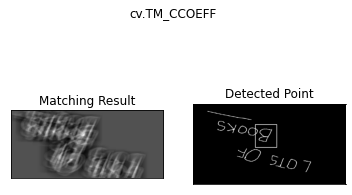

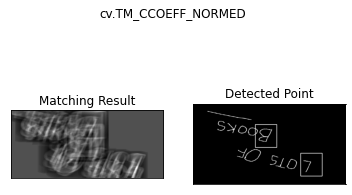

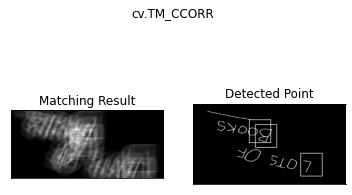

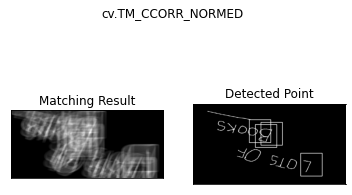

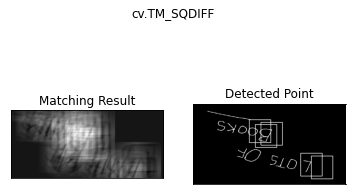

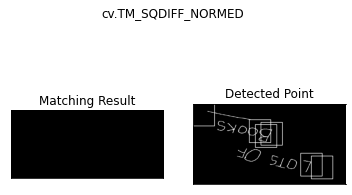

In [31]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/frase_escrita.png',0)
img2 = np.copy(img)
template = cv.imread('images/letra_b.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img2 = np.copy(img)
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [40]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/frase_escrita.png',0)
img2 = np.copy(img)
template = cv.imread('images/letra_b.png',0)
w, h = template.shape[::-1]
# los 6 methodos
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

img2 = np.copy(img)
method = eval('cv.TM_CCOEFF')
# templado
res = cv.matchTemplate(img,template,cv.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
# para los mtedos sqddif y norm considerea el minimos
if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
    top_left = min_loc
else:
    top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv.rectangle(img,top_left, bottom_right, 255, 2)

cv.imshow('Imagen', img) 

cv.waitKey(0)
cv.destroyAllWindows()